In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.weightstats import ztest
import plotly.graph_objects as go
import plotly.express as px
import pandas_profiling
%pip install autoviz
from autoviz.AutoViz_Class import AutoViz


Note: you may need to restart the kernel to use updated packages.


ImportError: cannot import name 'AutoViz' from 'autoviz.AutoViz_Class' (/home/imad/anaconda3/lib/python3.7/site-packages/autoviz/AutoViz_Class.py)

In [3]:
data = pd.read_csv('upobesity.csv')

In [4]:
data.head()

,Age,BMI,WC,HbA1c,FPG,TC,TG,HDL,GROUP,LDL,CH_HDL,FI,HOMA_IR,hsCRP,GENSINI,SYNTAX
0,62,20.00,80.0,5.4,88,226,108,44,1,160,5.1,5.10,2.6,2.10,56.0,22.5
1,54,21.90,82.0,4.4,83,178,157,34,1,96,4.2,4.87,1.0,1.40,38.0,15.0
2,64,18.80,102.0,6.1,92,184,237,27,2,110,6.8,4.87,1.1,0.89,22.0,38.0
3,52,31.25,106.0,5.8,96,150,127,61,4,64,2.5,16.95,4.0,0.70,2.5,7.0
4,60,40.30,102.0,6.3,116,168,167,42,4,93,4.0,29.63,8.5,1.32,4.0,7.0


In [5]:
report = pandas_profiling.ProfileReport(data)
report
report.to_file(output_file = "report.html")

In [6]:
from autoviz.AutoViz_Class import AutoViz_Class

Shape of your Data Set: (100, 16)
Classifying variables in data set...
    16 Predictors classified...
        This does not include the Target column(s)
    No variables removed since no ID or low-information variables found in data set
Number of All Scatter Plots = 28
Could not draw Distribution Plot
Number of Categorical and Continuous Vars exceeds limit, hence no Bar Plots
Time to run AutoViz (in seconds) = 3.826


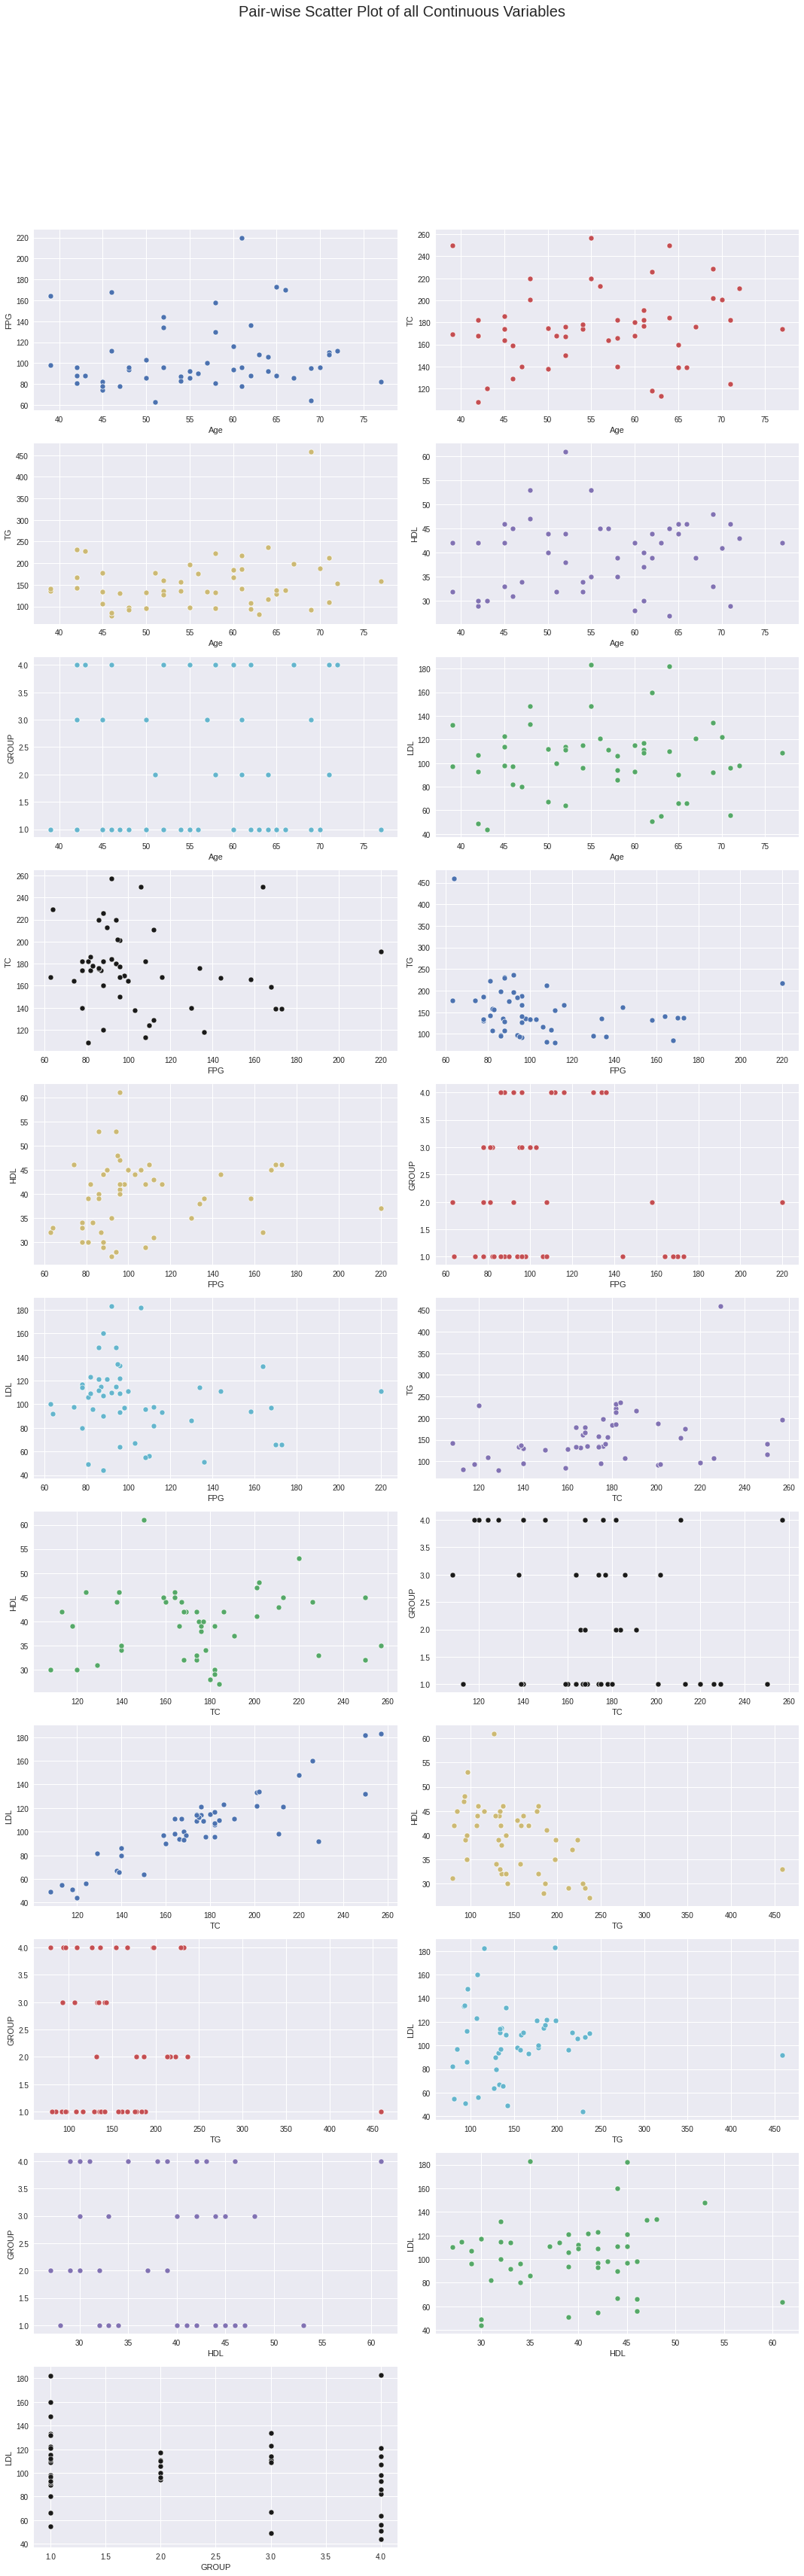

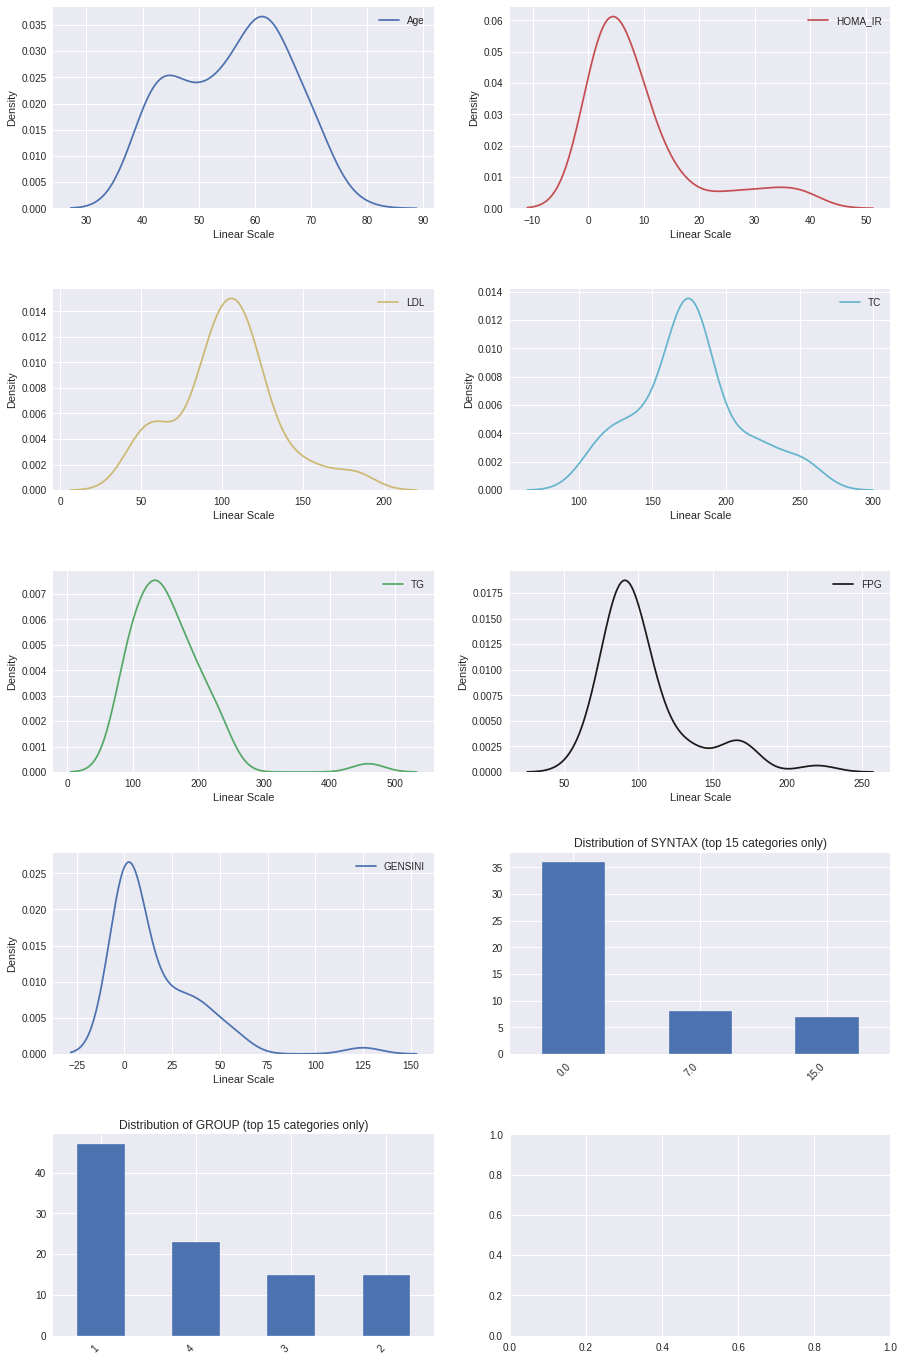

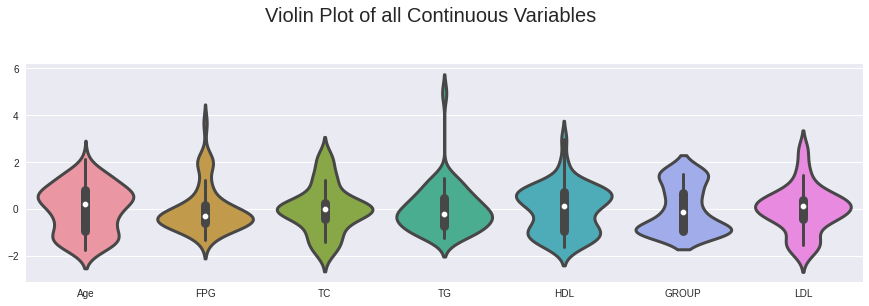

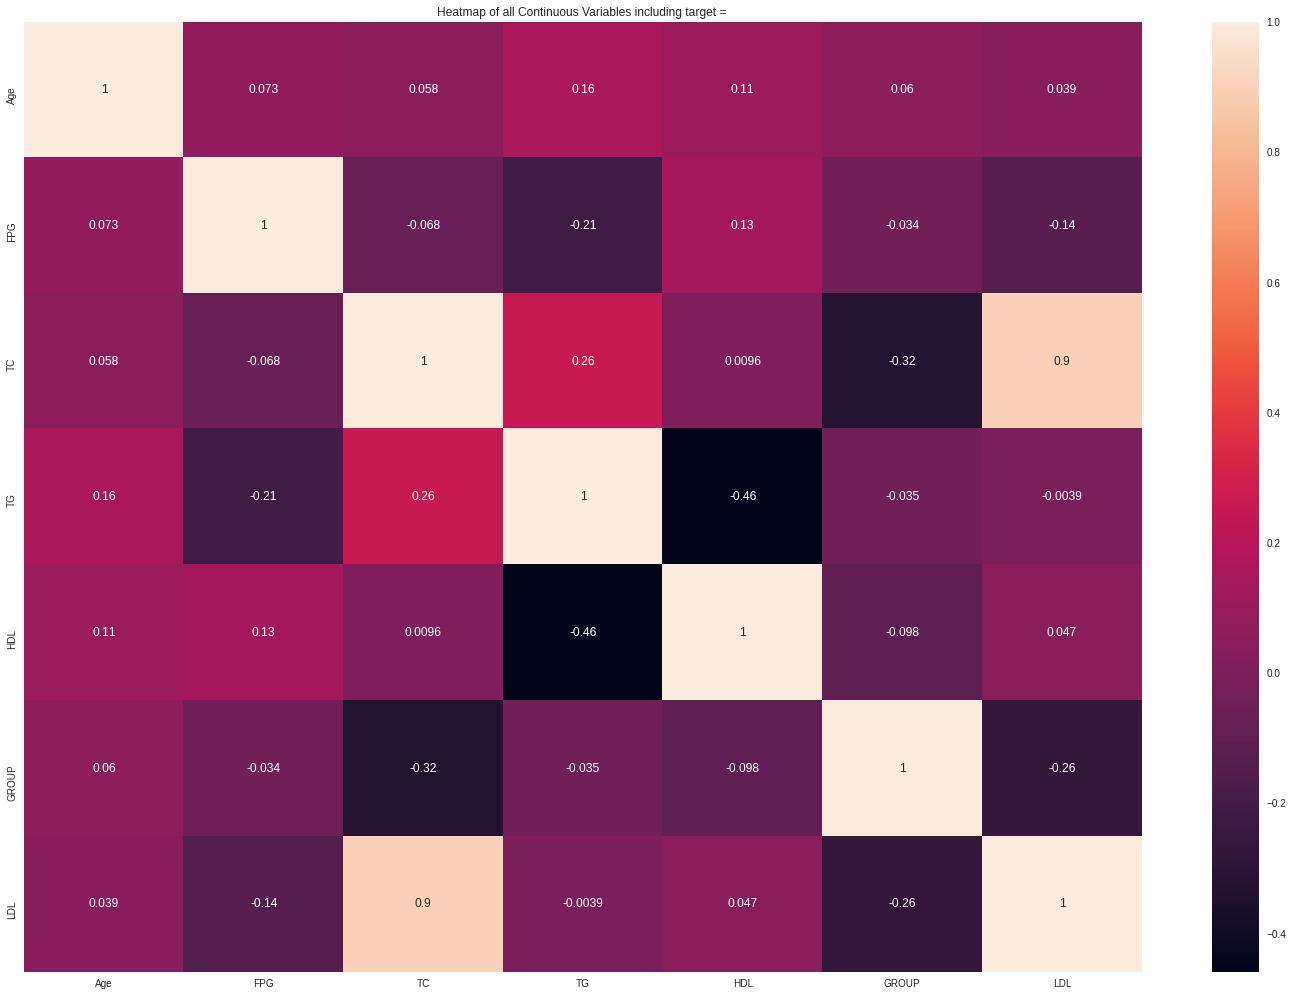

In [7]:
AV = AutoViz_Class()
report2 = AV.AutoViz('upobesity.csv')

In [8]:
data = data.dropna()
data.head()

,Age,BMI,WC,HbA1c,FPG,TC,TG,HDL,GROUP,LDL,CH_HDL,FI,HOMA_IR,hsCRP,GENSINI,SYNTAX
0,62,20.00,80.0,5.4,88,226,108,44,1,160,5.1,5.10,2.6,2.10,56.0,22.5
1,54,21.90,82.0,4.4,83,178,157,34,1,96,4.2,4.87,1.0,1.40,38.0,15.0
2,64,18.80,102.0,6.1,92,184,237,27,2,110,6.8,4.87,1.1,0.89,22.0,38.0
3,52,31.25,106.0,5.8,96,150,127,61,4,64,2.5,16.95,4.0,0.70,2.5,7.0
4,60,40.30,102.0,6.3,116,168,167,42,4,93,4.0,29.63,8.5,1.32,4.0,7.0


In [10]:
data_gensini = data[:]
data_syntax = data[:]

In [11]:
del data_gensini['SYNTAX']
del data_syntax['GENSINI']

In [12]:
data_gensini.head()

,Age,BMI,WC,HbA1c,FPG,TC,TG,HDL,GROUP,LDL,CH_HDL,FI,HOMA_IR,hsCRP,GENSINI
0,62,20.00,80.0,5.4,88,226,108,44,1,160,5.1,5.10,2.6,2.10,56.0
1,54,21.90,82.0,4.4,83,178,157,34,1,96,4.2,4.87,1.0,1.40,38.0
2,64,18.80,102.0,6.1,92,184,237,27,2,110,6.8,4.87,1.1,0.89,22.0
3,52,31.25,106.0,5.8,96,150,127,61,4,64,2.5,16.95,4.0,0.70,2.5
4,60,40.30,102.0,6.3,116,168,167,42,4,93,4.0,29.63,8.5,1.32,4.0


In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
import xgboost as xg

In [15]:
ML_ALGO = {
"RANDOM FOREST" : RandomForestRegressor(n_estimators = 500),
"K NEAREST NEIGHBOR " : KNeighborsRegressor(n_neighbors=3),
"LOGISTIC REGRESSION" : LogisticRegression(),
"LINEAR SVC": SVR(),
"NAIVE BAYES" : GaussianNB(),
"XGBOOST": xg.XGBRegressor()
}

In [16]:
X_gen = data_gensini[:]
del X_gen['GENSINI']
Y_gen = list(data_gensini['GENSINI'].astype('int'))

X_syn = data_syntax[:]
del X_syn['SYNTAX']
Y_syn = list(data_syntax['SYNTAX'].astype('int'))

In [17]:
result = {}
print("Testing ML ALgorithm's for GENSINI...")
for key,alg in ML_ALGO.items():
    clf = alg
    scores = cross_val_score(clf,X_gen,Y_gen,cv=10,scoring='neg_mean_absolute_error')
    print("\n",str(key)+"'s mean absolute error: ",scores.mean())
    result[key] = scores.mean()

Best = max(result, key = result.get)
print("\nThe best algorithm for this problem is %s with an error of %f%%." % (Best,result[Best]))

Testing ML ALgorithm's for GENSINI...

 RANDOM FOREST's mean absolute error:  -6.373163821067822

 K NEAREST NEIGHBOR 's mean absolute error:  -12.368888888888888

 LOGISTIC REGRESSION's mean absolute error:  -4.2155555555555555

 LINEAR SVC's mean absolute error:  -15.71634570103121

 NAIVE BAYES's mean absolute error:  -3.0088888888888894

 XGBOOST's mean absolute error:  -2.6288963089386628

The best algorithm for this problem is XGBOOST with an error of -2.628896%.
